# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [2]:
data=pd.read_csv('pima-indians-diabetes.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [56]:
data.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
667,10,111,70,27,0,27.5,0.141,40,1
338,9,152,78,34,171,34.2,0.893,33,1
359,1,196,76,36,249,36.5,0.875,29,1
197,3,107,62,13,48,22.9,0.678,23,1
135,2,125,60,20,140,33.8,0.088,31,0
13,1,189,60,23,846,30.1,0.398,59,1
446,1,100,72,12,70,25.3,0.658,28,0
746,1,147,94,41,0,49.3,0.358,27,1
42,7,106,92,18,0,22.7,0.235,48,0
394,4,158,78,0,0,32.9,0.803,31,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [6]:
data.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [7]:
data.shape

(768, 9)

In [15]:
data.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [70]:
data["Preg"]=data["Preg"].replace(0,data["Preg"].median())
data["Plas"]=data["Plas"].replace(0,data["Plas"].median())
data["Pres"]=data["Pres"].replace(0,data["Pres"].median())
data["skin"]=data["skin"].replace(0,data["skin"].median())
data["test"]=data["test"].replace(0,data["test"].median())

# Q5 Print the descriptive statistics of each & every column using describe() function

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [36]:
data.median().T

Preg       3.0000
Plas     117.0000
Pres      72.0000
skin      23.0000
test      30.5000
mass      32.0000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [33]:
data.groupby(["class"]).count()

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


C:\Users\Sashsam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


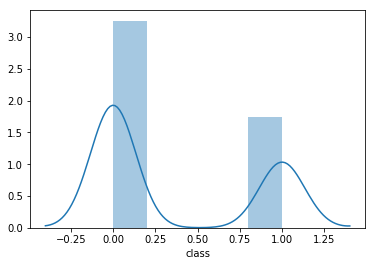

In [27]:
sns.distplot(data["class"])

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

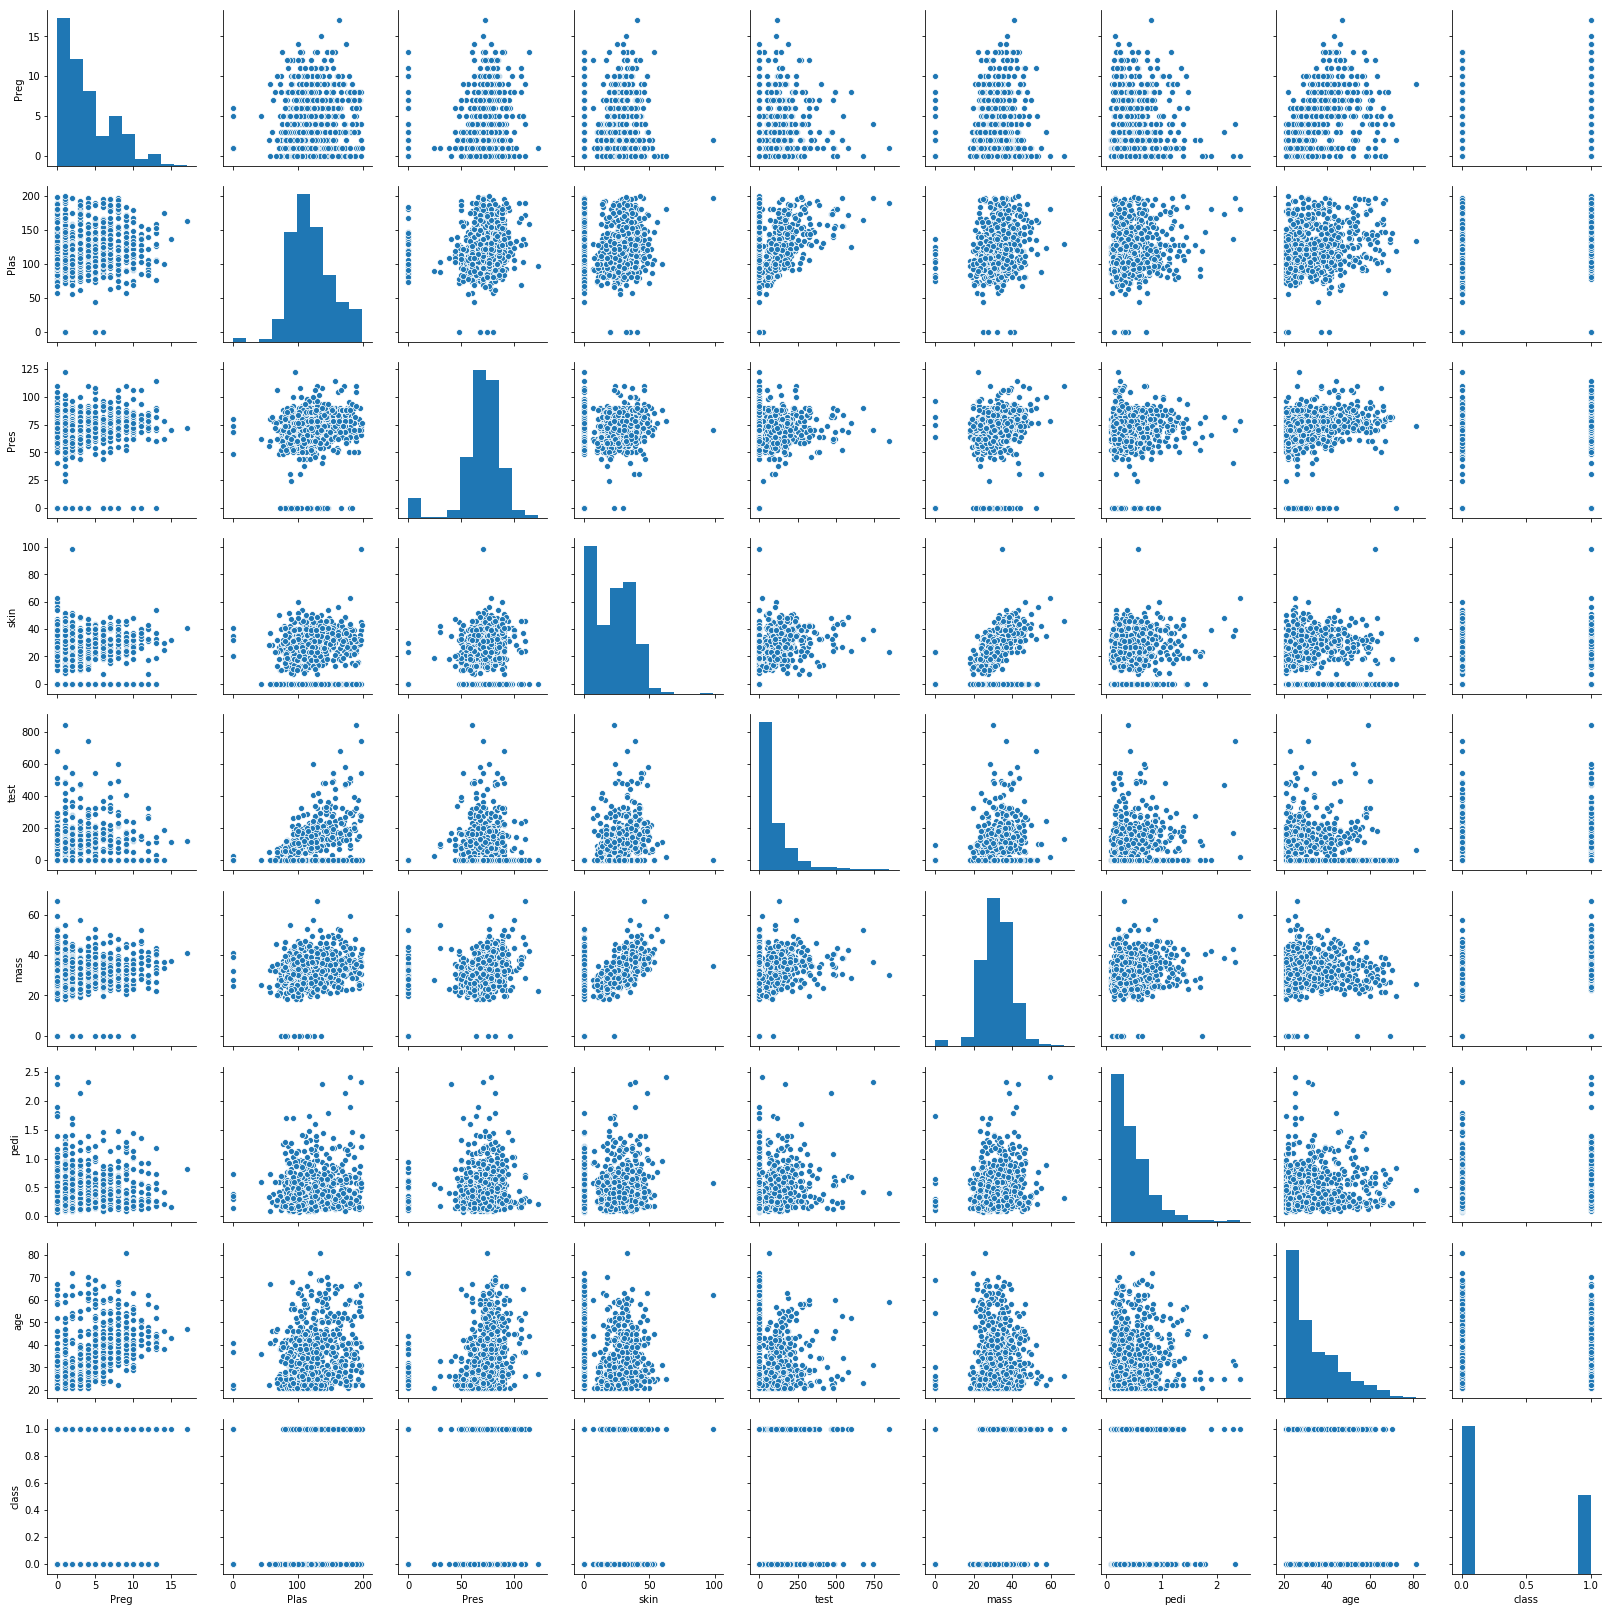

In [29]:
sns.pairplot(data)

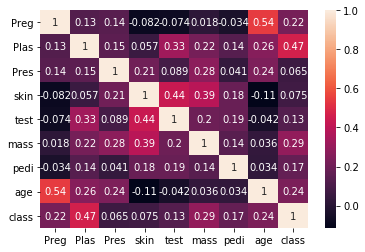

In [34]:
sns.heatmap( data.corr(), annot=True)

Inference:

Data for all variables are skewed, especially variable 'test'
Mean = 79.97 if rounded gives 80 while median is 30 thus extreme long tail on right
Normally distributed variables(plas,pres,mass and skin)
There is no obvious relationship between age and onset of diabetes
There is no obvious relationship between pedi and onset of diabetes

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [39]:
X = data.drop("class", axis=1)
y = data["class"]

In [38]:
test_size = 0.30 
seed = 7  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [57]:
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [58]:
model.score(X_train,y_train)

1.0

In [59]:
model.score(X_test,y_test)

0.7272727272727273

In [60]:
y_predict = model.predict(X_test)

In [61]:
metrics.confusion_matrix(y_predict, y_test)

array([[116,  32],
       [ 31,  52]], dtype=int64)

Print the feature importance of the decision model - Optional

In [73]:
model.feature_importances_

array([0.06575633, 0.29961498, 0.10141688, 0.05166816, 0.02639717,
       0.19009786, 0.16571808, 0.09933054])